<a href="https://colab.research.google.com/github/SID-SURANGE/EIP/blob/master/1st_DNN_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
#!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


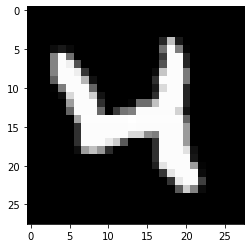

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[20],cmap='gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [80]:
from keras.layers import Activation
# model = Sequential()
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26*26*32
model.add(Convolution2D(64, 3, 3, activation='relu'))  #24*24*64
model.add(MaxPooling2D(pool_size=(2,2))) #12*12*64
model.add(Dropout(0.5))
model.add(Convolution2D(64, 1)) #12*12*64
model.add(Dropout(0.25))
model.add(Convolution2D(10, 12)) #1*1*10
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [81]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 12, 12, 64)        4160      
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 1, 1, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [89]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=12, verbose=1)

Epoch 1/12
  512/60000 [..............................] - ETA: 19s - loss: 0.0137 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 13s 210us/step - loss: 0.0271 - acc: 0.9912
Epoch 2/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0247 - acc: 0.9919
Epoch 3/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0247 - acc: 0.9921
Epoch 4/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0243 - acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0241 - acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0219 - acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.0235 - acc: 0.9926
Epoch 8/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0221 - acc: 0.9925
Epoch 9/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0224 - acc: 0.9930
Epoch 10/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.0210 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [91]:
print(score)

[0.029672589743542265, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [93]:
print(y_pred[:9])
print(y_test[:9])

[[1.1271760e-12 1.9184638e-11 6.4089619e-08 7.6737319e-07 6.3011950e-15
  2.4738456e-12 1.1687595e-17 9.9999917e-01 3.9819977e-11 1.0260844e-08]
 [4.3413140e-09 4.3109672e-08 1.0000000e+00 1.4065675e-11 1.6387664e-12
  4.1378682e-16 3.4177052e-08 1.2845289e-13 8.0150374e-12 1.1026774e-13]
 [1.2094021e-09 9.9998522e-01 1.0052674e-07 4.2127488e-10 9.0646408e-06
  1.7981536e-07 4.4409560e-08 9.1434362e-07 4.3855985e-06 6.6933796e-09]
 [9.9999905e-01 3.1330932e-14 5.7760719e-08 1.9622812e-11 2.6314916e-12
  4.3407753e-11 9.8575515e-07 1.2498476e-11 2.0753015e-09 1.2456579e-09]
 [1.4900032e-12 7.5089778e-12 2.9186428e-12 1.1935387e-13 9.9999976e-01
  8.3019434e-14 4.4754226e-13 5.3807139e-11 6.4232042e-10 2.5287494e-07]
 [2.6613647e-10 9.9995470e-01 1.8307732e-08 2.8443550e-11 4.0046558e-05
  3.1068741e-09 2.6833127e-10 3.7551813e-06 1.5544967e-06 2.6086379e-08]
 [2.8690916e-15 1.1825450e-09 1.8496826e-10 6.0102709e-13 9.9987638e-01
  4.1670642e-08 1.5537738e-13 5.7537519e-10 7.4517382e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

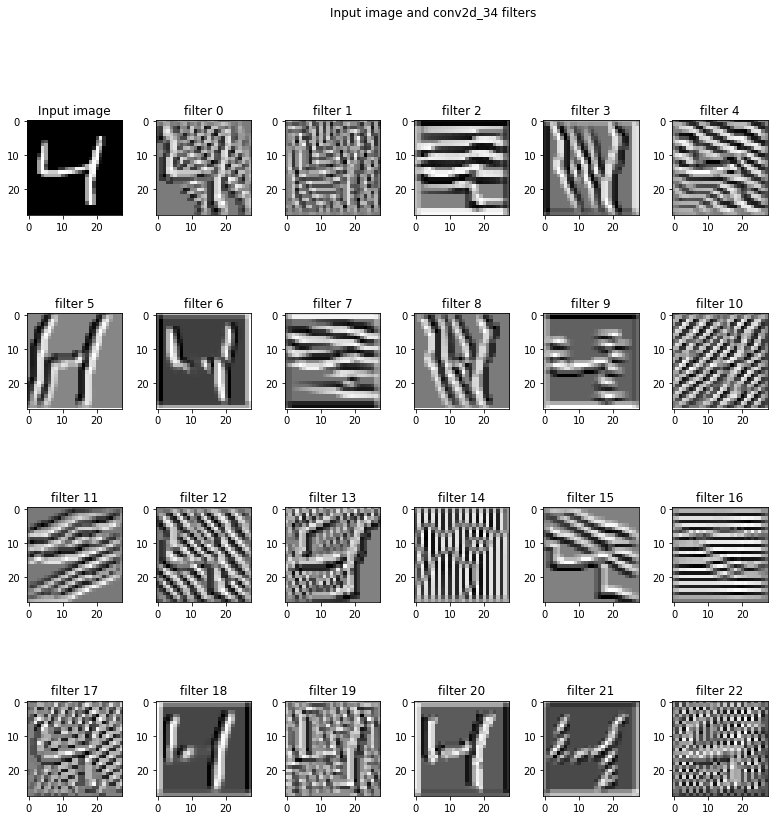

In [97]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_34'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()